In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from scipy.misc import imread
import os 
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import random
import glob
import scipy.cluster.hierarchy as hac
from sklearn import mixture

In [2]:
MA_location = {"Greater_Boston_Area" : 0,
         "Salem" : 0, 
         "Plymouth" : 0, 
         "Waltham" : 0, 
         "Framingham" : 0,
         "Worcester" : 0,
         "Lexington" : 0,
         "Danvers" : 0,
        }
Greater_Boston_Area = {"Boston" : 0, 
                       "Providence" : 0, 
                       "Lowell" : 0, 
                       "Cambridge" : 0, 
                       "Quincy" : 0,
                       "Newton" : 0
                      }
city_detail = [400, 700, 200, 600]
cwd = os.getcwd()

In [37]:
def read_company_csv(file_name, result):
    with open("Company/" + file_name, newline = '', encoding = 'utf-8') as csvfile:
        datareader = csv.reader(csvfile, delimiter = ',')
        next(datareader)
        for row in datareader:
            if (row[2] in Greater_Boston_Area):
                row[2] = "Greater_Boston_Area"
                result.append(row)
            elif (row[2] in MA_location):
                result.append(row)

In [4]:
def read_company_location_csv(file_name):
    with open("Company/" + file_name, newline = '', encoding = 'utf-8') as csvfile:
        datareader = csv.reader(csvfile, delimiter = ',')
        next(datareader)
        for row in datareader:
            if (row[2] in Greater_Boston_Area):
                MA_location["Greater_Boston_Area"]+=1
            elif (row[2] in MA_location):
                MA_location[row[2]]+=1

In [5]:
location = []
path = cwd + "/Company"
files = os.listdir(path)
for file_name in files:
    read_company_location_csv(file_name)

In [6]:
print(MA_location)

{'Framingham': 190, 'Greater_Boston_Area': 7545, 'Waltham': 281, 'Danvers': 171, 'Salem': 101, 'Worcester': 813, 'Lexington': 567, 'Plymouth': 103}


In [8]:
datafile = cbook.get_sample_data(cwd + '/massachusetts.jpg')
img = imread(datafile)

In [27]:
MA_Cities_Coordinates = {"Greater_Boston_Area" : [550, 410, 6000, 'red'],
                        "Worcester" : [380, 400, 1000, 'blue'],
                        "Lexington" : [500, 440, 900, 'green'],
                        "Waltham" : [500, 405, 800, 'black'],
                        "Framington" : [465, 395, 700, 'yellow'],
                        "Danvers" : [480, 480, 600, 'brown'],
                        "Plymouth" : [600, 300, 500, 'pink'],
                        "Salem" : [580, 460, 400, 'grey']}

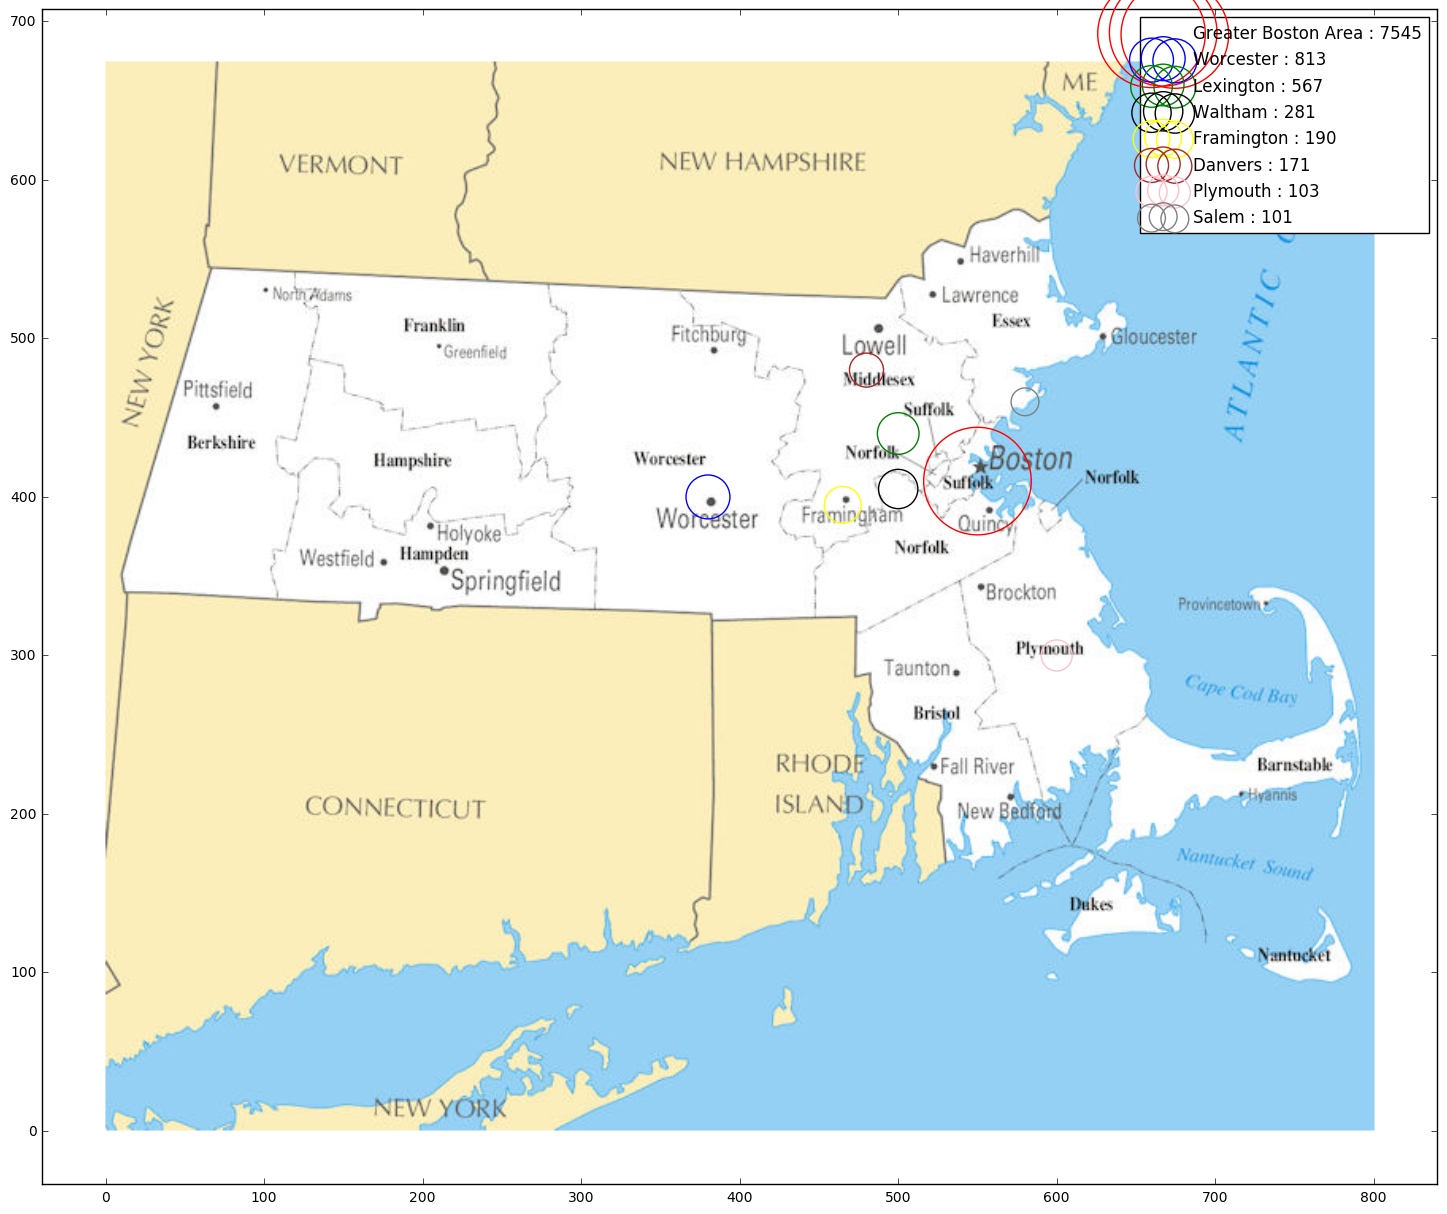

In [31]:
width = 18
height = 16
plt.figure(figsize=(width, height))
plt.imshow(img, extent = [0, 800, 0, 674])
colors = ['blue', 'green', 'red', 'black', 'yellow', 'brown', 'pink', 'grey', 'orange']
# Greater Boston Area 7545
plta = plt.scatter(550, 410, s=6000, facecolors='none', edgecolors='red')
# Worcester 813
pltb = plt.scatter(380, 400, s=1000, facecolors='none', edgecolors='blue')
# Lexington 567
pltc = plt.scatter(500, 440, s=900, facecolors='none', edgecolors='green')
# Waltham 281
pltd = plt.scatter(500, 405, s=800, facecolors='none', edgecolors='black')
# Framington 190
plte = plt.scatter(465, 395, s=700, facecolors='none', edgecolors='yellow')
# Danvers 171
pltf = plt.scatter(480, 480, s=600, facecolors='none', edgecolors='brown')
# Plymouth 103
pltg = plt.scatter(600, 300, s=500, facecolors='none', edgecolors='pink')
# Salem 101
plth = plt.scatter(580, 460, s=400, facecolors='none', edgecolors='grey')
# 
# plt.scatter(x = 100, y = 100, color = 'red', s = 20)
plt.legend((plta, pltb, pltc, pltd, plte, pltf, pltg, plth), 
           ("Greater Boston Area : 7545", 
            "Worcester : 813", 
            "Lexington : 567", 
            "Waltham : 281", 
            "Framington : 190",
            "Danvers : 171",
            "Plymouth : 103",
            "Salem : 101"))
plt.show()

In [38]:
result = []
path = cwd + "/Company"
files = os.listdir(path)
for file_name in files:
    read_company_csv(file_name, result)

In [39]:
str_list = []
for x in result:
    str = x[1] + " " + x[2]
    str_list.append(str)

In [40]:
vectorizer = TfidfVectorizer(min_df = 1)
D = vectorizer.fit_transform(str_list)

In [41]:
k = 8
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
kmeans_predict = kmeans.fit_predict(D)

In [42]:
print("K means")
print("Top terms per cluster:")
asc_order_centroids = kmeans.cluster_centers_.argsort()#[:, ::-1]
order_centroids = asc_order_centroids[:,::-1]
terms = vectorizer.get_feature_names()
for i in range(k):
    print("Cluster {}:".format(i))
    for ind in order_centroids[i, :10]:
        print(' {}'.format(terms[ind]))
    print('')

K means
Top terms per cluster:
Cluster 0:
 greater_boston_area
 engineer
 coordinator
 worcester
 analyst
 specialist
 intern
 service
 patient
 technician

Cluster 1:
 assistant
 administrative
 greater_boston_area
 research
 medical
 worcester
 ii
 executive
 care
 clinical

Cluster 2:
 senior
 specialist
 accounting
 inventory
 financial
 advisor
 documentation
 greater_boston_area
 technical
 lexington

Cluster 3:
 inside
 rep
 sales
 greater_boston_area
 representative
 waltham
 plymouth
 manager
 esb
 escort

Cluster 4:
 president
 vice
 assistant
 training
 greater_boston_area
 of
 executive
 business
 globallink
 transfer

Cluster 5:
 manager
 project
 lexington
 greater_boston_area
 guard
 security
 operational
 account
 command
 control

Cluster 6:
 associate
 sales
 greater_boston_area
 cashier
 markets
 personal
 representative
 operations
 care
 senior

Cluster 7:
 it
 system
 computer
 analyst
 greater_boston_area
 consultant
 technician
 business
 director
 waltham



In [43]:
z = hac.linkage(D.toarray(), 'ward')
print(z)

[[  0.00000000e+00   1.00000000e+00   0.00000000e+00   2.00000000e+00]
 [  4.80100000e+03   4.82000000e+03   0.00000000e+00   2.00000000e+00]
 [  5.01000000e+03   9.77200000e+03   0.00000000e+00   3.00000000e+00]
 ..., 
 [  1.95190000e+04   1.95370000e+04   1.75077850e+01   8.88800000e+03]
 [  1.95360000e+04   1.95380000e+04   1.89520684e+01   9.57300000e+03]
 [  1.40440000e+04   1.95390000e+04   1.92394927e+01   9.77100000e+03]]


In [ ]:
gmix = mixture.GMM(n_components=7, covariance_type='full')
gmix.fit(D.toarray())
print(gmix.means_)
GT = gmix.fit_predict(D.toarray())

In [ ]:
z = hac.linkage(D.toarray(), 'ward')
T = hac.fcluster(z, 10, 'maxclust')
hierarchy_result = [None]*10
for i in range(0, len(T)):
    if (hierarchy_result[T[i]-1] is None):
        hierarchy_result[T[i]-1] = []
    else:
        if (parsed_data[i]['categories'][0] in hierarchy_result[T[i] - 1]):
            continue
        hierarchy_result[T[i]-1].append(str_list[i]['categories'][0])

In [ ]:
print("Hierarchy Cluster")
print("Top terms per cluster:")

for i in range(10):
    print("Cluster {}:".format(i))
    new_result = hierarchy_result[i]
    for ind in new_result[0: 3]:
        print(' {}'.format(ind))
    print('')

In [ ]:
# gmm_result = [None]*9
# for i in range(0, len(GT)):
#     if (gmm_result[GT[i]-1] is None):
#         gmm_result[GT[i]-1] = []
#     else:
#         if (parsed_data[i]['categories'][0] in gmm_result[GT[i] - 1]):
#             continue
#         gmm_result[GT[i]-1].append(parsed_data[i]['categories'][0])

In [ ]:
# print("GMM Cluster")
# print("Top terms per cluster:")

# for i in range(9):
#     print("Cluster {}:".format(i))
#     new_result = gmm_result[i]
#     for ind in new_result[0: 5]:
#         print(' {}'.format(ind))
#     print('')

In [24]:
# datafile = cbook.get_sample_data(cwd + '\Boston.png')
# img = imread(datafile)

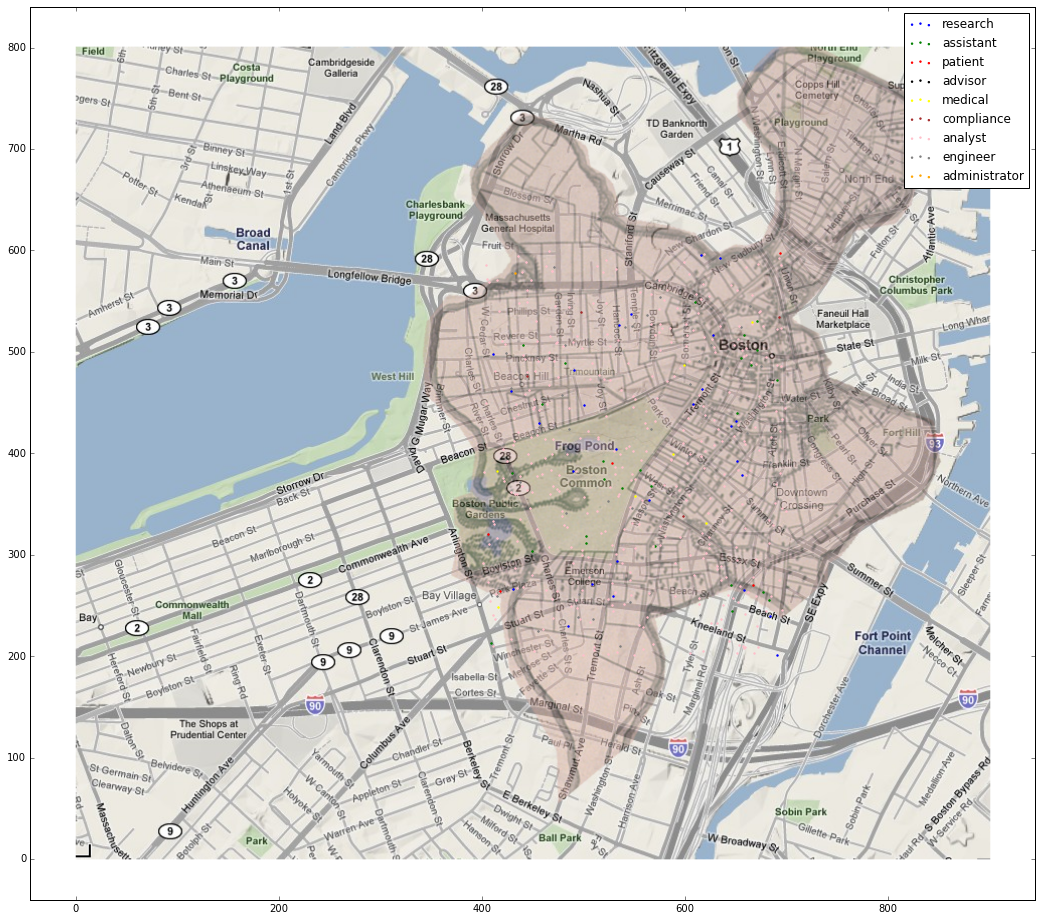

In [45]:
width = 18
height = 16
plt.figure(figsize=(width, height))
plt.imshow(img, extent = [0, 900, 0, 800])
# K-Means scatter plot
colors = ['blue', 'green', 'red', 'black', 'yellow', 'brown', 'pink', 'grey', 'orange']
for i in range(0, 500):
    X = random.uniform(city_detail[0], city_detail[1])
    Y = random.uniform(city_detail[2], city_detail[3])
    if (kmeans.labels_[i] == 0):
        plta = plt.scatter(x = X, y = Y, color = colors[0], s = 2)
    elif (kmeans.labels_[i] == 1):
        pltb = plt.scatter(x = X, y = Y, color = colors[1], s = 2)
    elif (kmeans.labels_[i] == 2):
        pltc = plt.scatter(x = X, y = Y, color = colors[2], s = 2)
    elif (kmeans.labels_[i] == 3):
        pltd = plt.scatter(x = X, y = Y, color = colors[3], s = 2)
    elif (kmeans.labels_[i] == 4):
        plte = plt.scatter(x = X, y = Y, color = colors[4], s = 2)
    elif (kmeans.labels_[i] == 5):
        pltf = plt.scatter(x = X, y = Y, color = colors[5], s = 2)
    elif (kmeans.labels_[i] == 6):
        pltg = plt.scatter(x = X, y = Y, color = colors[6], s = 2)
    elif (kmeans.labels_[i] == 7):
        plth = plt.scatter(x = X, y = Y, color = colors[7], s = 2)
    elif (kmeans.labels_[i] == 8):
        plti = plt.scatter(x = X, y = Y, color = colors[8], s = 2)
# plt.scatter(x = 1200, y = 1200, s=0)
plt.legend((plta, pltb, pltc, pltd, plte, pltf, pltg, plth, plti), 
           (terms[order_centroids[0, 0]], 
            terms[order_centroids[1, 0]], 
            terms[order_centroids[2, 0]], 
            terms[order_centroids[3, 0]],
            terms[order_centroids[4, 0]],
            terms[order_centroids[5, 0]],
            terms[order_centroids[6, 1]],
            terms[order_centroids[7, 0]],
            terms[order_centroids[8, 0]]))

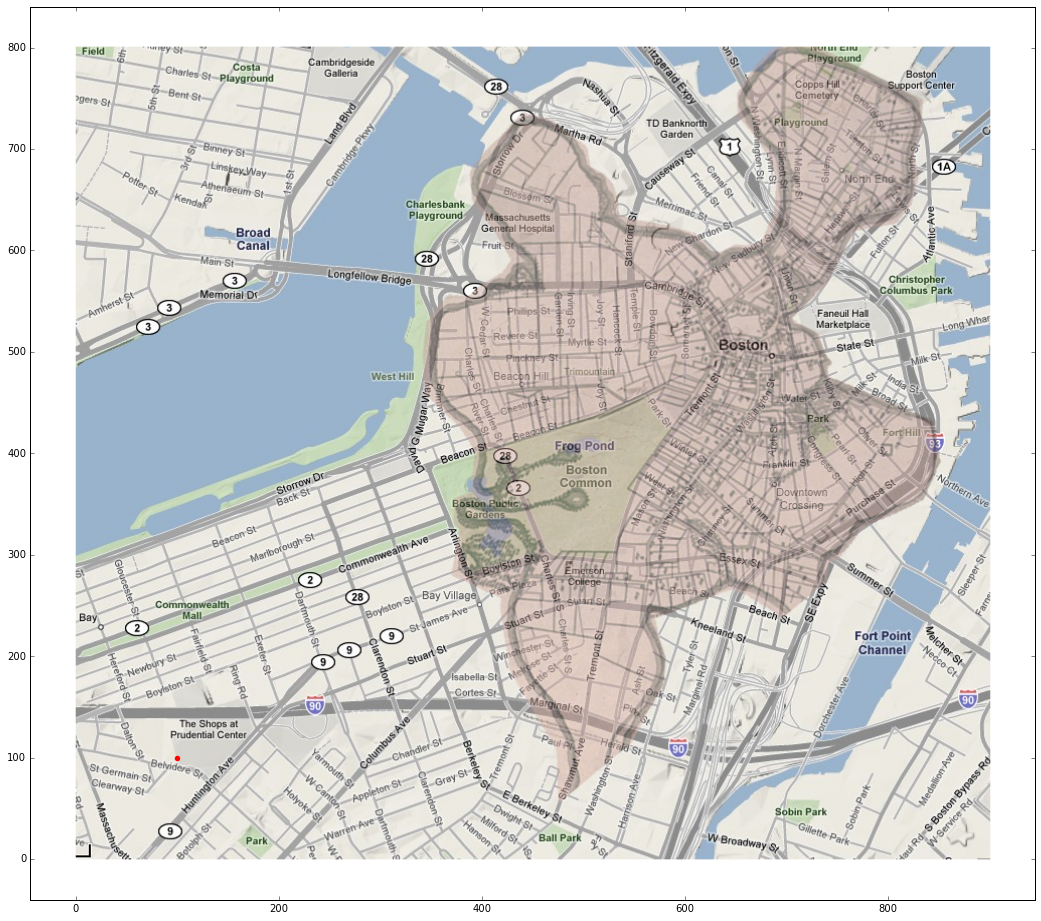

In [68]:
width = 18
height = 16
plt.figure(figsize=(width, height))
plt.imshow(img, extent = [0, 900, 0, 800])
# plt.scatter(x = 100, y = 100, color = 'red', s = 20)
plt.show()